# Bayesian inference under measurement noise

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<b> Problem 3.2 <b>:

In this problem, we numerically calculate a posterior distribution. Suppose the
stimulus distribution ps(s) is Gaussian with mean 20 and standard deviation 4. The measurement
distribution px|s(x|s) is Gaussian with standard deviation σ = 5. A Bayesian observer infers s from
an observed measurement xobs = 30. We are now going to calculate the posterior probability density
using numerical methods.

a) Define a vector of hypothesized stimulus values s: (0, 0.2, 0.4, . . . , 40).

b) Compute the likelihood function and the prior on this vector of s values.

c) Multiply the likelihood and the prior pointwise.

d) Divide this product by its sum over all s (normalization step).

e) Convert this posterior probability mass function into a probability density function by dividing
by the step size you used in your vector of s values (e.g., 0.2).

f) Plot the likelihood, prior, and posterior in the same plot.

g) Is the posterior wider or narrower than likelihood and prior? Do you expect this based on the
equations we discussed?

h) Change the standard deviation of the measurement distribution to a large value. What happens
to the posterior? Can you explain this?

i) Change the standard deviation of the measurement distribution to a small value. What
happens to the posterior? Can you explain this?

In [9]:
#define a vector

step = 0.2
S = np.arange(0,40 + step, step)

#information about stimulus and measurement distributions

mean_S = 20
Sd_S = 4

std_x_given_s = 5
xobs = 30

# Prior distribution 
prior = (1 / (Sd_S * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((S - mean_S) / Sd_S) ** 2)

# Likelihood function (Gaussian)
likelihood = (1 / (std_x_given_s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xobs - S) / std_x_given_s) ** 2)

In [23]:
#now lets multiply likelihood and prior for part c

unnormalized_posterior = prior * likelihood

#we can normalize this with deviding into sum of all values
posterior = unnormalized_posterior / np.sum(unnormalized_posterior * step)
len(posterior)

#deviding by step for posterior density

posterior_density = posterior / step

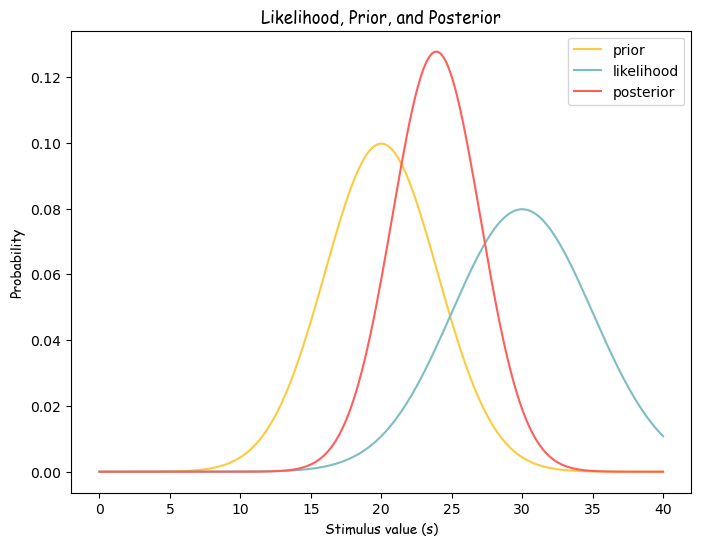

In [41]:
#plotting

plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
plt.figure(figsize= (8,6))
plt.plot(S,prior, color = color_custom[1], label='prior' )
plt.plot(S, likelihood, color = color_custom[2], label='likelihood')
plt.plot(S, posterior, color = color_custom[0], label='posterior')
plt.xlabel('Stimulus value (s)',**csfont)
plt.ylabel('Probability',**csfont)
plt.legend()
plt.title('Likelihood, Prior, and Posterior',**csfont)
plt.tight_layout()
plt.show()

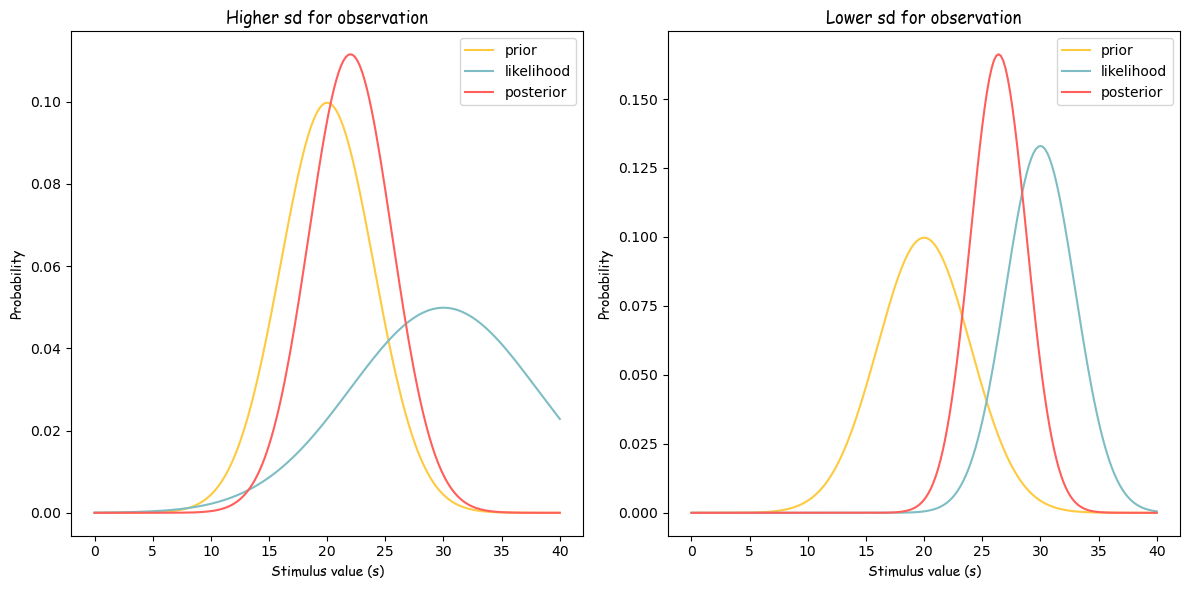

In [57]:
#larger sd
mean_S = 20
Sd_S = 4

std_x_given_s = 8
xobs = 30
# Prior distribution 
prior2 = (1 / (Sd_S * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((S - mean_S) / Sd_S) ** 2)
# Likelihood function (Gaussian)
likelihood2 = (1 / (std_x_given_s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xobs - S) / std_x_given_s) ** 2)

#we can normalize this with deviding into sum of all values
posterior2 = (prior2 * likelihood2) / np.sum((prior2 * likelihood2) * step)

#smaller sd
mean_S = 20
Sd_S = 4

std_x_given_s = 3
xobs = 30
# Prior distribution 
prior3 = (1 / (Sd_S * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((S - mean_S) / Sd_S) ** 2)
# Likelihood function (Gaussian)
likelihood3 = (1 / (std_x_given_s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xobs - S) / std_x_given_s) ** 2)
posterior3 = (prior3 * likelihood3) / np.sum((prior3 * likelihood3) * step)

#plotting
plt.figure(figsize= (12,6))
plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
plt.subplot(1,2,1)
plt.plot(S,prior2, color = color_custom[1], label='prior' )
plt.plot(S, likelihood2, color = color_custom[2], label='likelihood')
plt.plot(S, posterior2, color = color_custom[0], label='posterior')
plt.xlabel('Stimulus value (s)',**csfont)
plt.ylabel('Probability',**csfont)
plt.legend()
plt.title('Higher sd for observation',**csfont)

plt.subplot(1,2,2)
plt.plot(S,prior3, color = color_custom[1], label='prior' )
plt.plot(S, likelihood3, color = color_custom[2], label='likelihood')
plt.plot(S, posterior3, color = color_custom[0], label='posterior')
plt.xlabel('Stimulus value (s)',**csfont)
plt.ylabel('Probability',**csfont)
plt.legend()
plt.title('Lower sd for observation',**csfont)
plt.tight_layout()
plt.show()

<b> Problem 3.3 <b>:

We expand on the previous problem by varying the stimulus distribution. Start with
the code from the previous problem. Suppose the stimulus distribution ps(s) is uniform on the
interval [−15,25] and 0 outside this interval. The measurement distribution px|s(x|s) is Gaussian
with standard deviation σ = 5. A Bayesian observer infers s from an observed measurement
xobs = 30. We are again going to calculate the posterior probability density numerically.

a) What is the value of p(s) on the interval [−15,25]?

b) Repeat parts (a)-(f) from the previous problem for this new stimulus distribution.

c) Is the posterior Gaussian?

d) Numerically calculate the mean of the posterior.

e) Numerically calculate the variance of the posterior.

In [30]:
step = 0.2
S = np.arange(0,40 + step, step)

#prior distribtion
#For a uniform distribution for ps(s) we have : 1/25-(-15) = 1/40
prior = np.where((S >= -15) & (S <= 25), 1/40, 0)

#measurement distribution
std_x_given_s = 5
xobs = 30

# Likelihood function (Gaussian)
likelihood = (1 / (std_x_given_s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xobs - S) / std_x_given_s) ** 2)

#normalize posterior
posterior = (prior * likelihood) / np.sum((prior * likelihood) * step)


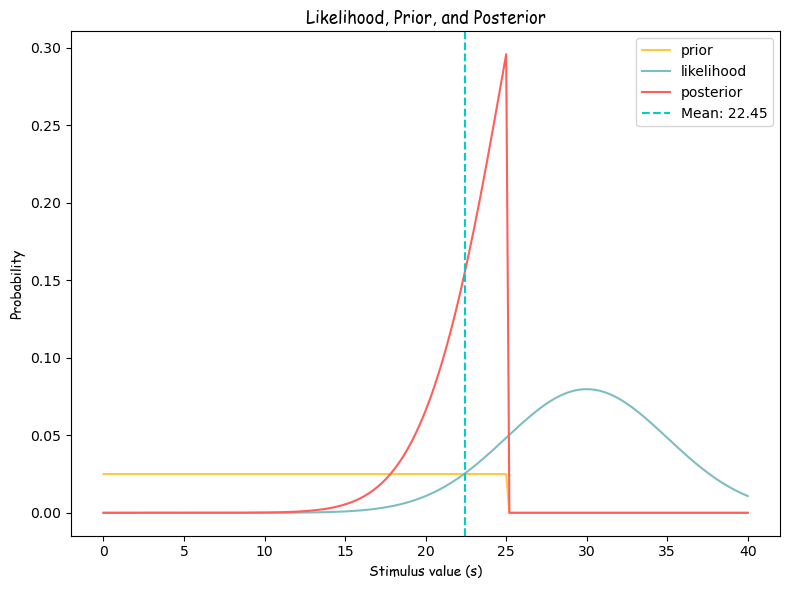

In [42]:
plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
plt.figure(figsize= (8,6))
plt.plot(S,prior, color = color_custom[1], label='prior' )
plt.plot(S, likelihood, color = color_custom[2], label='likelihood')
plt.plot(S, posterior, color = color_custom[0], label='posterior')
Posterior_Mean= np.sum(S * posterior * step)
Posterior_Variance = np.sum(((S - Posterior_Mean) ** 2) * posterior * step)
posterior_std = np.sqrt(Posterior_Variance)
plt.axvline(posterior_mean, color=color_custom[3], linestyle='--', label=f'Mean: {posterior_mean:.2f}')
plt.xlabel('Stimulus value (s)',**csfont)
plt.ylabel('Probability',**csfont)
plt.legend()
plt.title('Likelihood, Prior, and Posterior',**csfont)
plt.tight_layout()

plt.show()

<b> Problem 3.6 <b> 

Besides Gaussians, there are other distributions for which we can calculate the
posterior analytically. Consider a stimulus distribution ps(s) that is equal to 0 for s < 0 and equal to
an exponential distribution, ps(s) = λe^−λs with λ > 0, for s ≥ 0. For the measurement distribution
px|s, we assume the usual: a Gaussian with mean s and variance σ2. A Bayesian observer infers s
from a measurement xobs.

a) Derive an equation for the posterior mean estimate.
    
b) Assume λ = 1 and xobs = 1. Plot the prior distribution, the normalized likelihood function,
and the posterior in a single plot.

In [20]:
#likelihood
S = np.linspace(0, 5, 500)
xobs = 1
std_x_given_s = 1 #NOT provided in the question, thus i put 1
likelihood = (1 / (std_x_given_s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xobs - S) / std_x_given_s) ** 2)

#prior
l = 1
prior = l * np.exp(-l * S) 

#posterior
unnormalized_posterior = likelihood * prior

# Normalize the posterior
posterior = unnormalized_posterior / np.trapz(unnormalized_posterior, S)

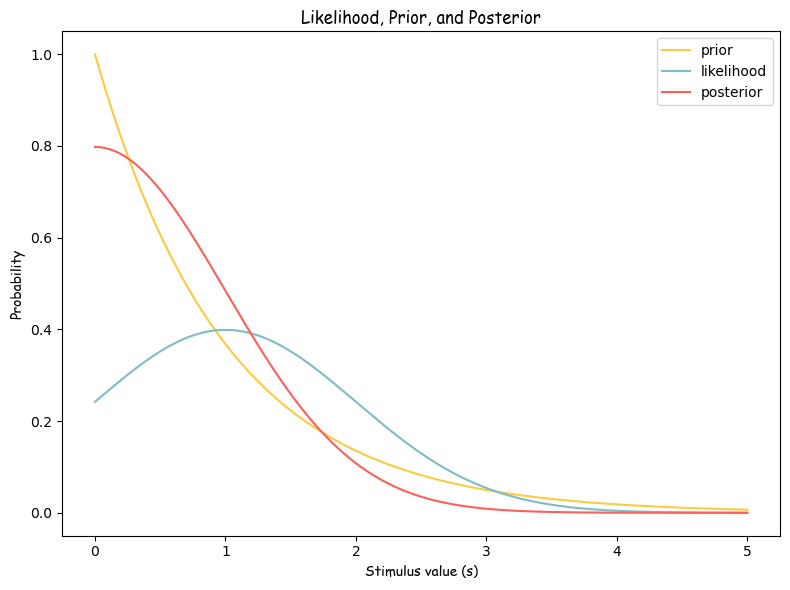

In [23]:
plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
plt.figure(figsize= (8,6))
plt.plot(S,prior, color = color_custom[1], label='prior' )
plt.plot(S, likelihood, color = color_custom[2], label='likelihood')
plt.plot(S, posterior, color = color_custom[0], label='posterior')
plt.xlabel('Stimulus value (s)',**csfont)
plt.ylabel('Probability',**csfont)
plt.legend()
plt.title('Likelihood, Prior, and Posterior',**csfont)
plt.tight_layout()

plt.show()

<b> Problem 3.7 <b>

In this chapter, we assumed that σ is independent of the stimulus s. This assumption is often violated in real problems, leading to heteroskedasticity. 

where σ(s) is the following function of s: σ(s) = 1 + s^2.

a) For s = 0,1,2, plot the measurement distribution (three curves in one plot, color-coded). All
three should look Gaussian.

b) For xobs = 0,1,2, plot the likelihood function over hypothesized s (three curves in one plot,
color-coded). None of them should look Gaussian.
    
c) Explain how it is possible that the measurement distributions are all Gaussian but the
likelihoods are not.
    
d) If the prior were Gaussian, would the posterior be Gaussian as well? Explain your answer
using math.

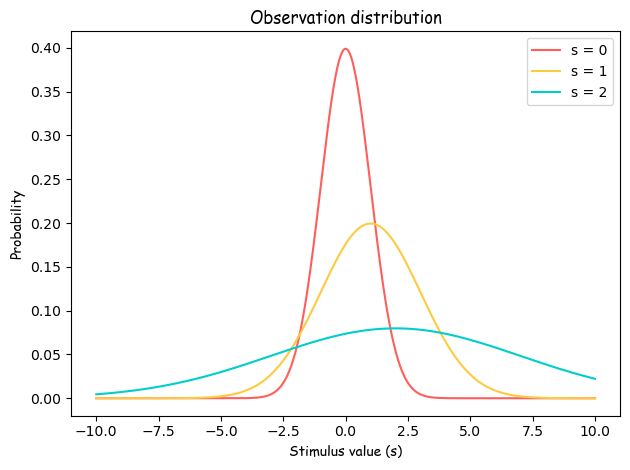

In [52]:
#measurement distribution

x_values = np.linspace(-10, 10, 500)

def measurement(s):
    sigma = 1 + s**2
    return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-0.5 * ((x_values - s)**2 / sigma**2))


colors = ['#FF5E5B', '#FDCA40', '#00CECB']
labels = ['s = 0', 's = 1', 's = 2']

plt.plot(x_values, measurement(0), color = colors[0], label = labels[0])
plt.plot(x_values, measurement(1), color = colors[1], label = labels[1])
plt.plot(x_values, measurement(2), color = colors[2], label = labels[2])

plt.xlabel('Stimulus value (s)',**csfont)
plt.ylabel('Probability',**csfont)
plt.legend()
plt.title('Observation distribution',**csfont)
plt.tight_layout()

plt.show()

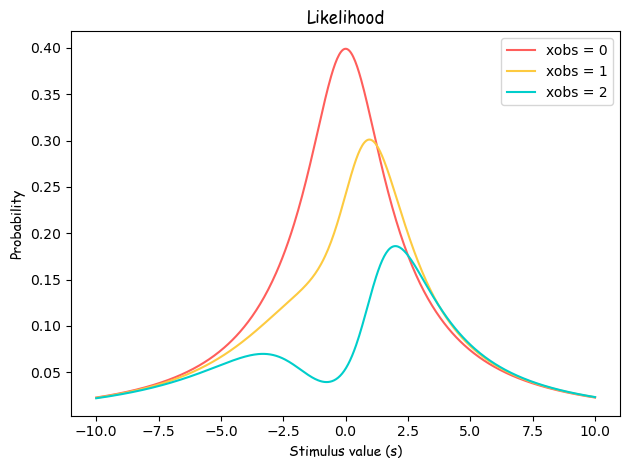

In [50]:
#likelihood

s = np.linspace(-4, 4, 500)
def likelihood(xobs):
    sigma = 1 + s**2
    return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-0.5 * ((xobs - s)**2 / sigma**2))

colors = ['#FF5E5B', '#FDCA40', '#00CECB']
labels = ['xobs = 0', 'xobs = 1', 'xobs = 2']
plt.plot(x_values, likelihood(0), color = colors[0], label = labels[0])
plt.plot(x_values, likelihood(1), color = colors[1], label = labels[1])
plt.plot(x_values, likelihood(2), color = colors[2], label = labels[2])
plt.xlabel('Stimulus value (s)',**csfont)
plt.ylabel('Probability',**csfont)
plt.legend()
plt.title('Likelihood',**csfont)
plt.tight_layout()

plt.show()

<b> Explanation <b>:
    
•	The measurement distribution 𝑝𝑥∣𝑠(𝑥∣𝑠)px∣s(x∣s) is Gaussian because for a fixed 𝑠s, the variability in 𝑥x follows a normal distribution with mean 𝑠s and standard deviation 𝜎(𝑠)=1+𝑠2σ(s)=1+s2. This gives the familiar bell-shaped curve for any fixed 𝑠.
    
•	The likelihood 𝑝𝑥∣𝑠(𝑥obs∣𝑠)px∣s(xobs∣s) is the probability of observing 𝑥obsxobs given different values of 𝑠s. For a fixed 𝑥obsxobs, this does not result in a Gaussian shape because the variance 𝜎(𝑠)2σ(s)2 changes with 𝑠s. As 𝑠 increases, the variance increases, stretching the likelihood function and distorting its shape from a Gaussian.
    
•   The posterior is not Gaussian if the prior is Gaussian when the likelihood variance depends on 𝑠 (heteroskedasticity). This is because the combined exponential terms in the posterior result in a non-quadratic exponent in s, leading to a non-Gaussian posterior.
